In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [5]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [6]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [7]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [8]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

20868.54

In [9]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [10]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [11]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-01-11 06:00:00+00:00  17401.42  18350.00  17312.68  18079.38   
        2023-01-12 06:00:00+00:00  18079.40  19109.28  17919.62  18780.68   
        2023-01-13 06:00:00+00:00  18780.19  21239.83  18775.69  20826.93   
        2023-01-14 06:00:00+00:00  20826.92  21170.88  20224.24  20736.04   
        2023-01-15 06:00:00+00:00  20734.08  20967.59  20558.86  20861.10   

                                         volume  trade_count          vwap  
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00      0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00      0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00      0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00      0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00      0.013400          3.0   8715.805970  
...                                         ...          ...           ...  
        2023-01-11 06:00:00+00:00  11652.868871     130476.0  17807.792543  
        2023-01-12 06:00:00+00:00  17774.351845     203041.0  18422.731210  
        2023-01-13 06:00:00+00:00  20322.083206     254872.0  19722.301989  
        2023-01-14 06:00:00+00:00  10593.861073     188507.0  20753.492266  
        2023-01-15 06:00:00+00:00   2684.760349      50664.0  20768.105861  

[983 rows x 7 columns]

In [12]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-01-11 06:00:00+00:00  17401.42  18350.00  17312.68  18079.38   
        2023-01-12 06:00:00+00:00  18079.40  19109.28  17919.62  18780.68   
        2023-01-13 06:00:00+00:00  18780.19  21239.83  18775.69  20826.93   
        2023-01-14 06:00:00+00:00  20826.92  21170.88  20224.24  20736.04   
        2023-01-15 06:00:00+00:00  20734.08  20967.59  20558.86  20861.10   

                                         volume  trade_count          vwap  
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00      0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00      0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00      0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00      0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00      0.013400          3.0   8715.805970  
...                                         ...          ...           ...  
        2023-01-11 06:00:00+00:00  11652.868871     130476.0  17807.792543  
        2023-01-12 06:00:00+00:00  17774.351845     203041.0  18422.731210  
        2023-01-13 06:00:00+00:00  20322.083206     254872.0  19722.301989  
        2023-01-14 06:00:00+00:00  10593.861073     188507.0  20753.492266  
        2023-01-15 06:00:00+00:00   2684.760349      50664.0  20768.105861  

[983 rows x 7 columns]

In [13]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 983 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-01-15 06:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         983 non-null    float64
 1   high         983 non-null    float64
 2   low          983 non-null    float64
 3   close        983 non-null    float64
 4   volume       983 non-null    float64
 5   trade_count  983 non-null    float64
 6   vwap         983 non-null    float64
dtypes: float64(7)
memory usage: 96.8+ KB


In [14]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08 05:00:00+00:00,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14 05:00:00+00:00,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22 05:00:00+00:00,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28 05:00:00+00:00,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30 05:00:00+00:00,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
978,BTC/USD,2023-01-11 06:00:00+00:00,17401.42,18350.00,17312.68,18079.38,11652.868871,130476.0,17807.792543
979,BTC/USD,2023-01-12 06:00:00+00:00,18079.40,19109.28,17919.62,18780.68,17774.351845,203041.0,18422.731210
980,BTC/USD,2023-01-13 06:00:00+00:00,18780.19,21239.83,18775.69,20826.93,20322.083206,254872.0,19722.301989
981,BTC/USD,2023-01-14 06:00:00+00:00,20826.92,21170.88,20224.24,20736.04,10593.861073,188507.0,20753.492266


In [15]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
978,BTC/USD,2023-01-11,17401.42,18350.00,17312.68,18079.38,11652.868871,130476.0,17807.792543
979,BTC/USD,2023-01-12,18079.40,19109.28,17919.62,18780.68,17774.351845,203041.0,18422.731210
980,BTC/USD,2023-01-13,18780.19,21239.83,18775.69,20826.93,20322.083206,254872.0,19722.301989
981,BTC/USD,2023-01-14,20826.92,21170.88,20224.24,20736.04,10593.861073,188507.0,20753.492266


In [16]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot

symbol,BTC/USD
timestamp,
2020-04-08,7314.00
2020-04-14,7100.00
2020-04-22,7118.50
2020-04-28,7836.00
2020-04-30,8653.00
...,...
2023-01-11,18079.38
2023-01-12,18780.68
2023-01-13,20826.93


In [17]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [18]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-08,NaN
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
...,...
2023-01-11,0.038870
2023-01-12,0.038790
2023-01-13,0.108955


In [19]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [20]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
2020-05-01,0.018895
...,...
2023-01-11,0.038870
2023-01-12,0.038790
2023-01-13,0.108955


In [21]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 2020-04-14 to 2023-01-15
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  982 non-null    float64
dtypes: float64(1)
memory usage: 15.3+ KB


In [22]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [23]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [24]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [25]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [26]:
# Display as dataframe
historical_quotes.df

open    high       low   close  \
symbol timestamp                                                     
GLD    2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   
...                                  ...     ...       ...     ...   
TLT    2023-01-09 05:00:00+00:00  104.41  105.93  104.2700  105.74   
       2023-01-10 05:00:00+00:00  104.53  104.82  103.5000  103.99   
       2023-01-11 05:00:00+00:00  104.97  105.72  104.7000  105.68   
       2023-01-12 05:00:00+00:00  105.82  107.81  104.5600  107.76   
       2023-01-13 05:00:00+00:00  107.10  107.80  106.3800  106.75   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-01-09 05:00:00+00:00  21589615.0     117697.0  105.338908  
       2023-01-10 05:00:00+00:00  20546925.0     132695.0  104.052210  
       2023-01-11 05:00:00+00:00  18836973.0     107057.0  105.210711  
       2023-01-12 05:00:00+00:00  32029608.0     175170.0  106.745085  
       2023-01-13 05:00:00+00:00  17840329.0     116831.0  106.959244  

[2094 rows x 7 columns]

In [27]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open    high       low   close  \
symbol timestamp                                                     
GLD    2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   
...                                  ...     ...       ...     ...   
TLT    2023-01-09 05:00:00+00:00  104.41  105.93  104.2700  105.74   
       2023-01-10 05:00:00+00:00  104.53  104.82  103.5000  103.99   
       2023-01-11 05:00:00+00:00  104.97  105.72  104.7000  105.68   
       2023-01-12 05:00:00+00:00  105.82  107.81  104.5600  107.76   
       2023-01-13 05:00:00+00:00  107.10  107.80  106.3800  106.75   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-01-09 05:00:00+00:00  21589615.0     117697.0  105.338908  
       2023-01-10 05:00:00+00:00  20546925.0     132695.0  104.052210  
       2023-01-11 05:00:00+00:00  18836973.0     107057.0  105.210711  
       2023-01-12 05:00:00+00:00  32029608.0     175170.0  106.745085  
       2023-01-13 05:00:00+00:00  17840329.0     116831.0  106.959244  

[2094 rows x 7 columns]

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2094 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-01-13 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2094 non-null   float64
 1   high         2094 non-null   float64
 2   low          2094 non-null   float64
 3   close        2094 non-null   float64
 4   volume       2094 non-null   float64
 5   trade_count  2094 non-null   float64
 6   vwap         2094 non-null   float64
dtypes: float64(7)
memory usage: 142.5+ KB


In [29]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08 04:00:00+00:00,155.91,155.94,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09 04:00:00+00:00,158.08,159.08,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13 04:00:00+00:00,159.17,162.38,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14 04:00:00+00:00,162.73,164.42,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15 04:00:00+00:00,161.80,162.54,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2089,TLT,2023-01-09 05:00:00+00:00,104.41,105.93,104.2700,105.74,21589615.0,117697.0,105.338908
2090,TLT,2023-01-10 05:00:00+00:00,104.53,104.82,103.5000,103.99,20546925.0,132695.0,104.052210
2091,TLT,2023-01-11 05:00:00+00:00,104.97,105.72,104.7000,105.68,18836973.0,107057.0,105.210711
2092,TLT,2023-01-12 05:00:00+00:00,105.82,107.81,104.5600,107.76,32029608.0,175170.0,106.745085


In [30]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2094 non-null   object             
 1   timestamp    2094 non-null   datetime64[ns, UTC]
 2   open         2094 non-null   float64            
 3   high         2094 non-null   float64            
 4   low          2094 non-null   float64            
 5   close        2094 non-null   float64            
 6   volume       2094 non-null   float64            
 7   trade_count  2094 non-null   float64            
 8   vwap         2094 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 147.4+ KB


In [31]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.91,155.94,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.08,159.08,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.17,162.38,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.73,164.42,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.80,162.54,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2089,TLT,2023-01-09,104.41,105.93,104.2700,105.74,21589615.0,117697.0,105.338908
2090,TLT,2023-01-10,104.53,104.82,103.5000,103.99,20546925.0,132695.0,104.052210
2091,TLT,2023-01-11,104.97,105.72,104.7000,105.68,18836973.0,107057.0,105.210711
2092,TLT,2023-01-12,105.82,107.81,104.5600,107.76,32029608.0,175170.0,106.745085


In [32]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
698,SPY,2020-04-08,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
699,SPY,2020-04-09,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
700,SPY,2020-04-13,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
701,SPY,2020-04-14,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
702,SPY,2020-04-15,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
1391,SPY,2023-01-09,390.37,393.7000,387.6700,387.86,73999806.0,550008.0,390.361862
1392,SPY,2023-01-10,387.25,390.6500,386.2700,390.58,65367664.0,472370.0,389.082150
1393,SPY,2023-01-11,392.23,395.6000,391.3800,395.52,68906217.0,453257.0,393.300850
1394,SPY,2023-01-12,396.67,398.4850,392.4200,396.96,90153435.0,664983.0,396.312220


In [33]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot

symbol,SPY
timestamp,
2020-04-08,274.00
2020-04-09,278.22
2020-04-13,275.63
2020-04-14,283.80
2020-04-15,277.75
...,...
2023-01-09,387.86
2023-01-10,390.58
2023-01-11,395.52


In [34]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 2020-04-08 to 2023-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     698 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [35]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily

symbol,SPY
timestamp,
2020-04-08,NaN
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
...,...
2023-01-09,-0.000567
2023-01-10,0.007013
2023-01-11,0.012648


In [36]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily

symbol,SPY
timestamp,
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
2020-04-16,0.004356
...,...
2023-01-09,-0.000567
2023-01-10,0.007013
2023-01-11,0.012648


In [37]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.91,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.08,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.17,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.73,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.80,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
693,GLD,2023-01-09,174.51,175.035,173.8810,174.10,5134804.0,39209.0,174.306650
694,GLD,2023-01-10,174.61,174.980,174.0600,174.74,4399085.0,34663.0,174.581799
695,GLD,2023-01-11,174.76,174.790,173.7200,174.62,3374594.0,29378.0,174.440098
696,GLD,2023-01-12,176.01,176.710,174.8800,176.64,6936919.0,51764.0,176.168421


In [38]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot

symbol,GLD
timestamp,
2020-04-08,154.65
2020-04-09,158.58
2020-04-13,161.41
2020-04-14,162.66
2020-04-15,162.00
...,...
2023-01-09,174.10
2023-01-10,174.74
2023-01-11,174.62


In [39]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 2020-04-08 to 2023-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     698 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [40]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily

symbol,GLD
timestamp,
2020-04-08,NaN
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
...,...
2023-01-09,0.002245
2023-01-10,0.003676
2023-01-11,-0.000687


In [41]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily

symbol,GLD
timestamp,
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
2020-04-16,-0.001790
...,...
2023-01-09,0.002245
2023-01-10,0.003676
2023-01-11,-0.000687


In [42]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
1396,TLT,2020-04-08,165.11,166.19,164.13,165.09,10147077.0,63686.0,165.217491
1397,TLT,2020-04-09,164.28,165.79,163.78,165.39,14260806.0,82515.0,164.996594
1398,TLT,2020-04-13,164.75,165.71,163.88,163.88,8750297.0,60771.0,164.679842
1399,TLT,2020-04-14,163.84,164.74,163.48,163.84,9019531.0,62051.0,164.073826
1400,TLT,2020-04-15,166.80,168.60,166.74,168.18,10027752.0,63827.0,167.874800
...,...,...,...,...,...,...,...,...,...
2089,TLT,2023-01-09,104.41,105.93,104.27,105.74,21589615.0,117697.0,105.338908
2090,TLT,2023-01-10,104.53,104.82,103.50,103.99,20546925.0,132695.0,104.052210
2091,TLT,2023-01-11,104.97,105.72,104.70,105.68,18836973.0,107057.0,105.210711
2092,TLT,2023-01-12,105.82,107.81,104.56,107.76,32029608.0,175170.0,106.745085


In [43]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot

symbol,TLT
timestamp,
2020-04-08,165.09
2020-04-09,165.39
2020-04-13,163.88
2020-04-14,163.84
2020-04-15,168.18
...,...
2023-01-09,105.74
2023-01-10,103.99
2023-01-11,105.68


In [44]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 2020-04-08 to 2023-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     698 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [45]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily

symbol,TLT
timestamp,
2020-04-08,NaN
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
...,...
2023-01-09,0.005324
2023-01-10,-0.016550
2023-01-11,0.016252


In [46]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily

symbol,TLT
timestamp,
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
2020-04-16,0.011357
...,...
2023-01-09,0.005324
2023-01-10,-0.016550
2023-01-11,0.016252


In [47]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod

symbol,BTC/USD
timestamp,
2020-04-14,0.970741
2020-04-22,0.973270
2020-04-28,1.071370
2020-04-30,1.183074
2020-05-01,1.205428
...,...
2023-01-11,2.471887
2023-01-12,2.567771
2023-01-13,2.847543


In [48]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod

symbol,SPY
timestamp,
2020-04-09,1.015401
2020-04-13,1.005949
2020-04-14,1.035766
2020-04-15,1.013686
2020-04-16,1.018102
...,...
2023-01-09,1.415547
2023-01-10,1.425474
2023-01-11,1.443504


In [49]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod

symbol,GLD
timestamp,
2020-04-09,1.025412
2020-04-13,1.043712
2020-04-14,1.051794
2020-04-15,1.047527
2020-04-16,1.045651
...,...
2023-01-09,1.125768
2023-01-10,1.129906
2023-01-11,1.129130


In [50]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod

symbol,TLT
timestamp,
2020-04-09,1.001817
2020-04-13,0.992671
2020-04-14,0.992428
2020-04-15,1.018717
2020-04-16,1.030287
...,...
2023-01-09,0.640499
2023-01-10,0.629899
2023-01-11,0.640136


In [51]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit

symbol,BTC/USD
timestamp,
2020-04-14,9707.410446
2020-04-22,9732.704403
2020-04-28,10713.699754
2020-04-30,11830.735576
2020-05-01,12054.279464
...,...
2023-01-11,24718.867925
2023-01-12,25677.713973
2023-01-13,28475.430681


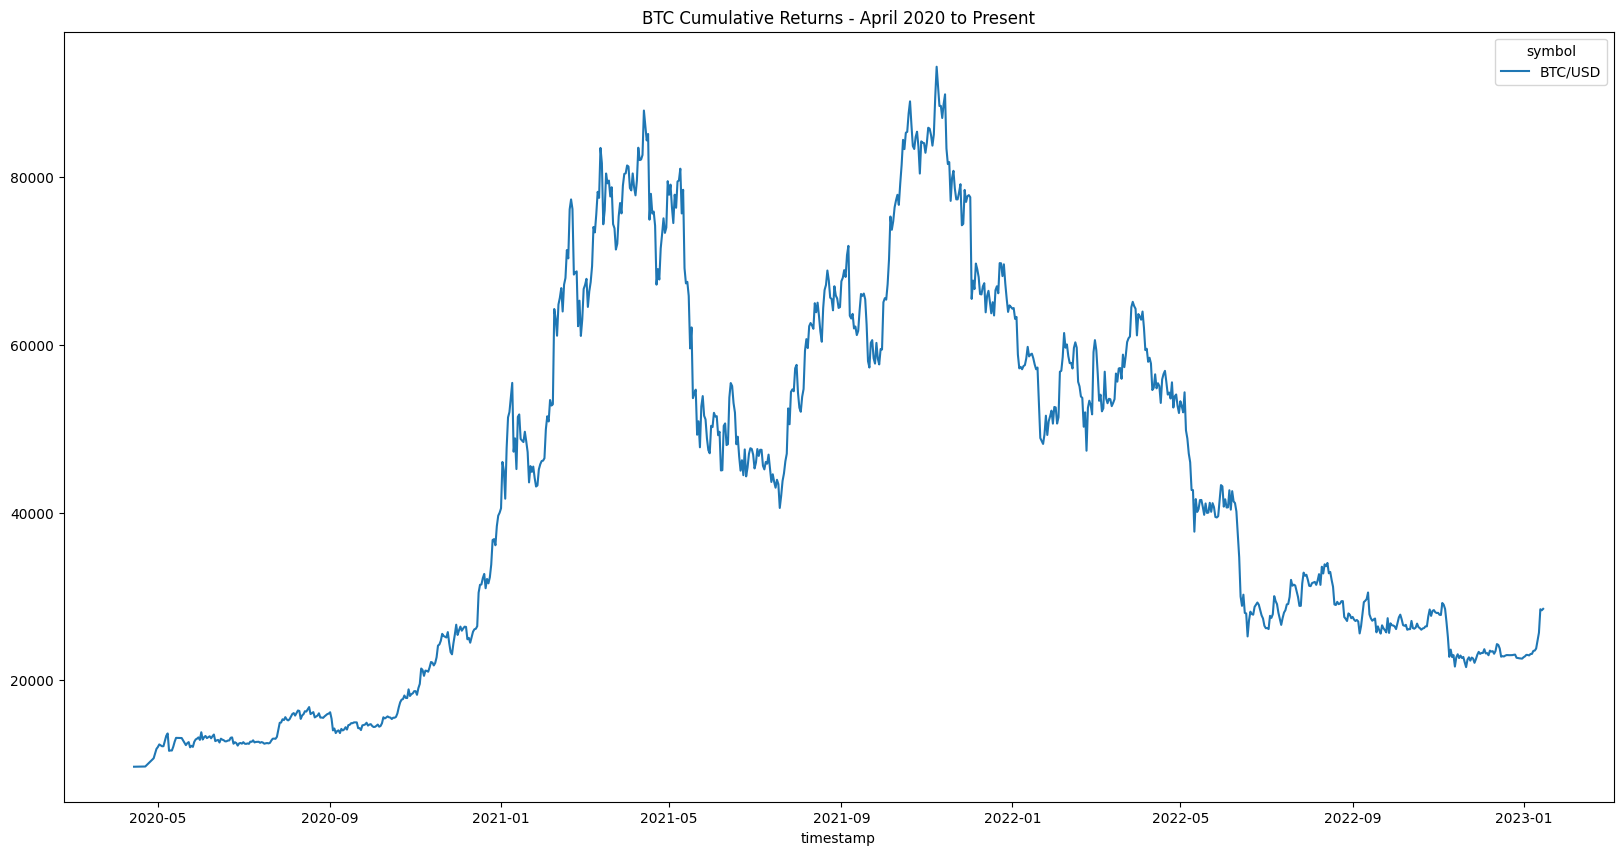

In [52]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(20,10), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [53]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit

symbol,SPY
timestamp,
2020-04-09,10154.014599
2020-04-13,10059.489051
2020-04-14,10357.664234
2020-04-15,10136.861314
2020-04-16,10181.021898
...,...
2023-01-09,14155.474453
2023-01-10,14254.744526
2023-01-11,14435.036496


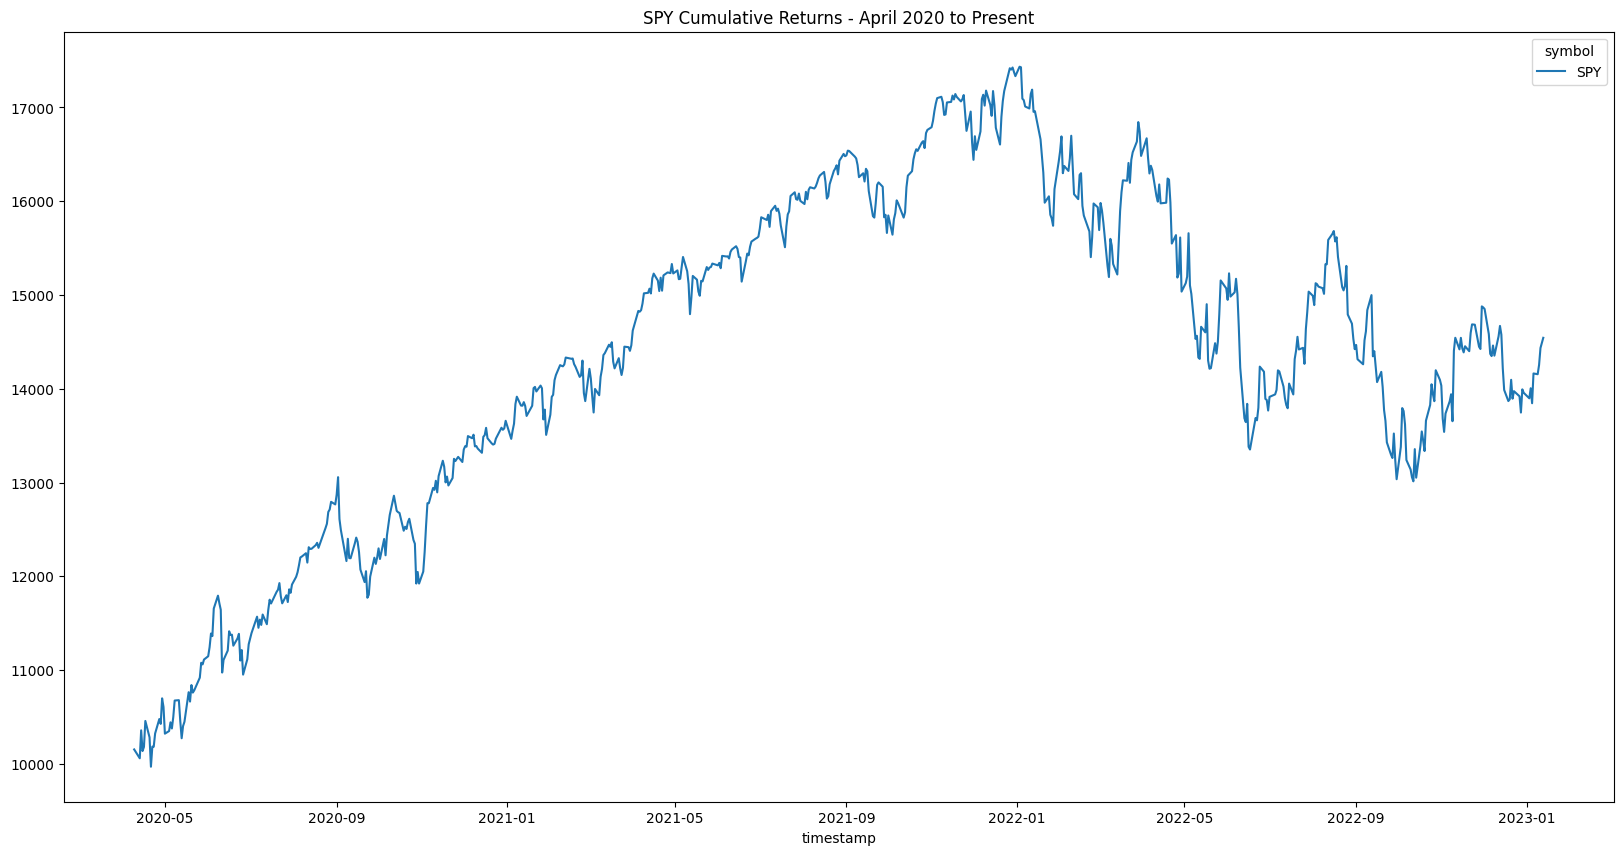

In [54]:
# Plot performance and save to Images
spy_profit.plot(figsize=(20,10), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [55]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit

symbol,GLD
timestamp,
2020-04-09,10254.122211
2020-04-13,10437.116069
2020-04-14,10517.943744
2020-04-15,10475.266731
2020-04-16,10456.514711
...,...
2023-01-09,11257.678629
2023-01-10,11299.062399
2023-01-11,11291.302942


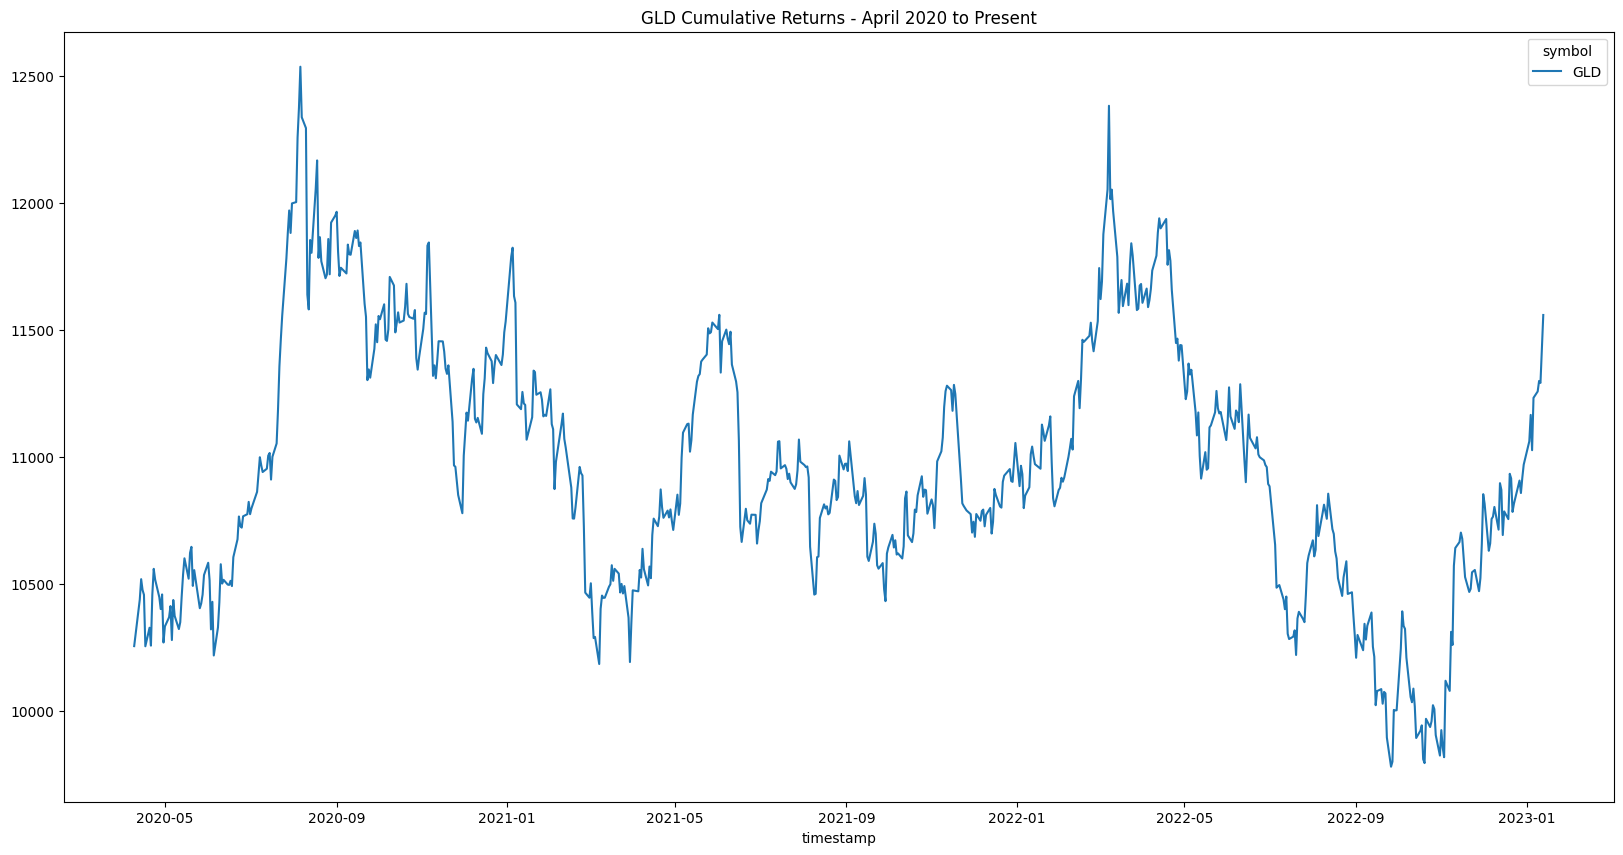

In [56]:
# Plot performance and save to Images
gld_profit.plot(figsize=(20,10), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [57]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit

symbol,TLT
timestamp,
2020-04-09,10018.171906
2020-04-13,9926.706645
2020-04-14,9924.283724
2020-04-15,10187.170634
2020-04-16,10302.865104
...,...
2023-01-09,6404.991217
2023-01-10,6298.988431
2023-01-11,6401.356836


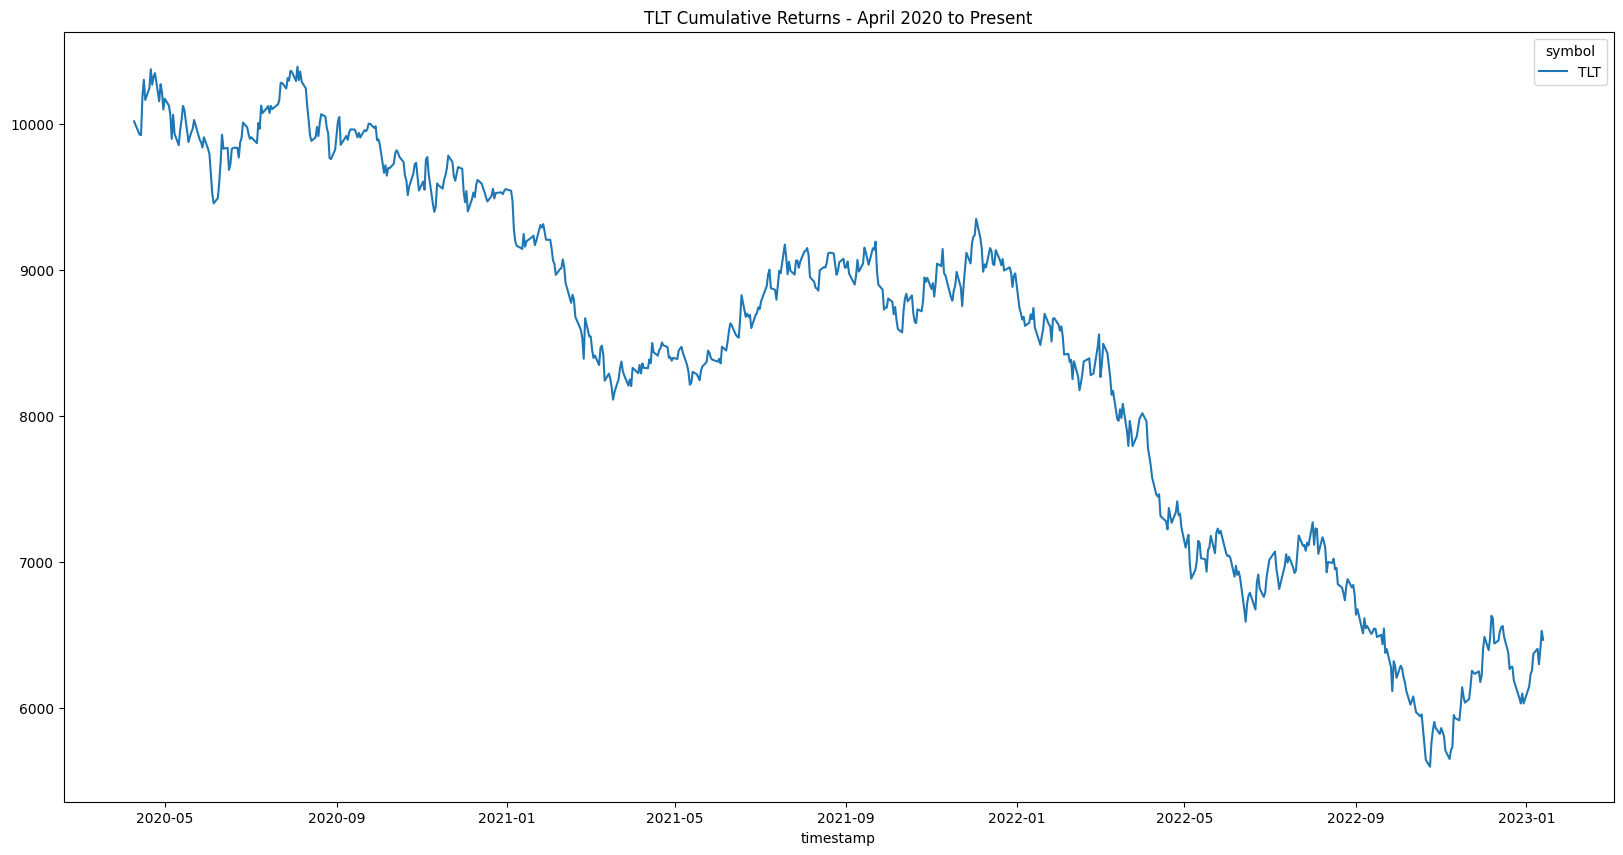

In [58]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(20,10), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

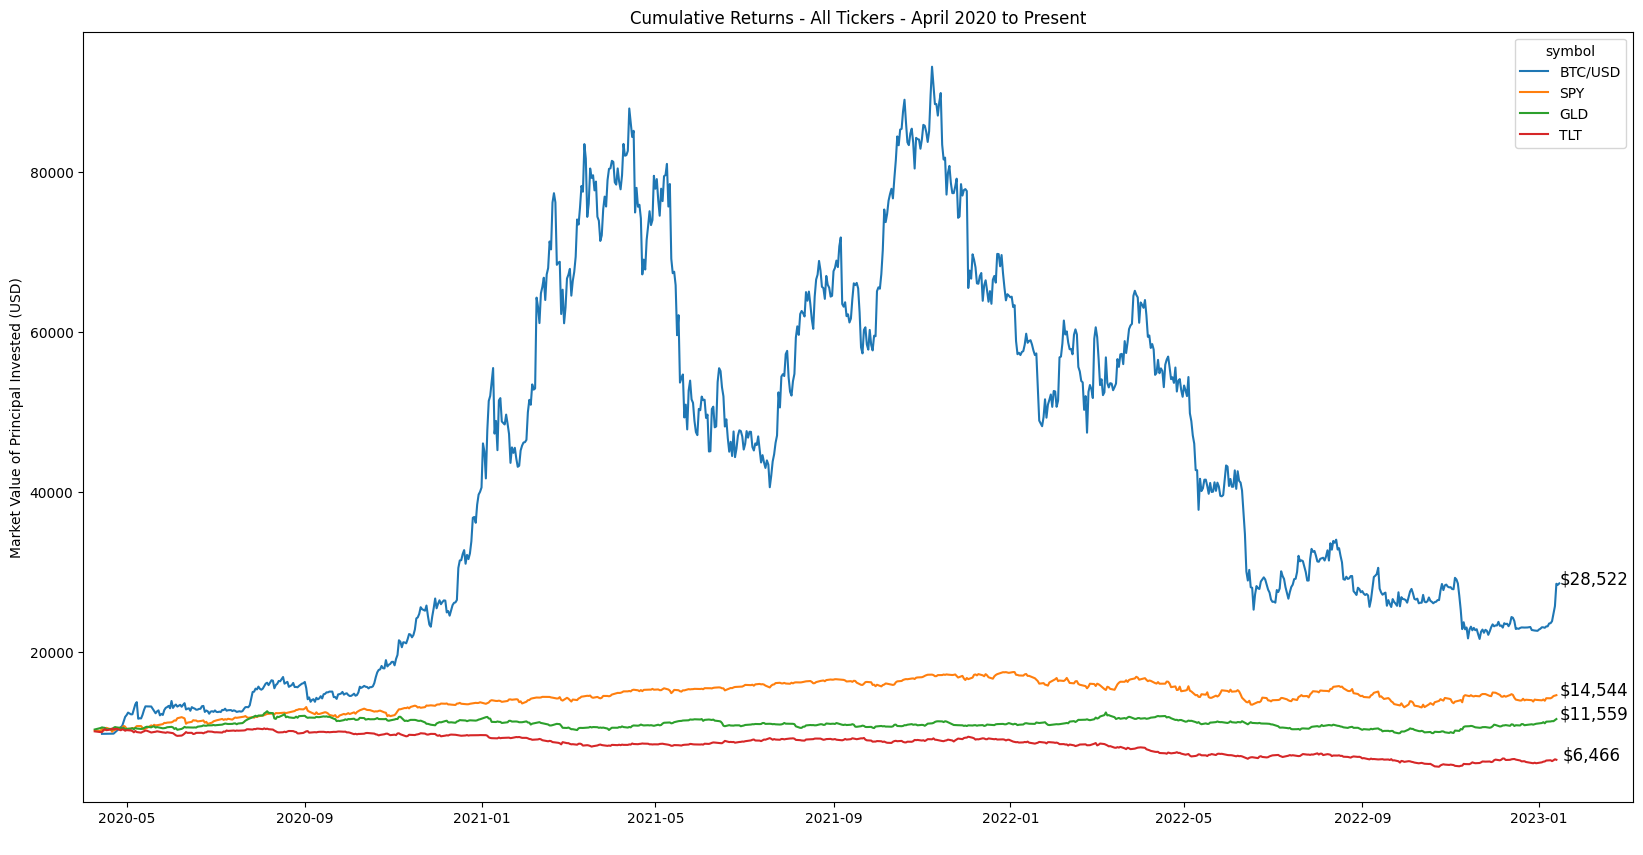

In [59]:
# Overlay of cumulative performances
ax = btc_profit.plot(figsize=(20,10), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text('2023-1-17', tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text('2023-1-15', gld_annotation, f"${gld_annotation:,}", size=12)
ax.text('2023-1-15', spy_annotation, f"${spy_annotation:,}", size=12)
ax.text('2023-1-15', btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', '2023-03-07')
plt.savefig("Images/OverlayCumulativeReturns.png");

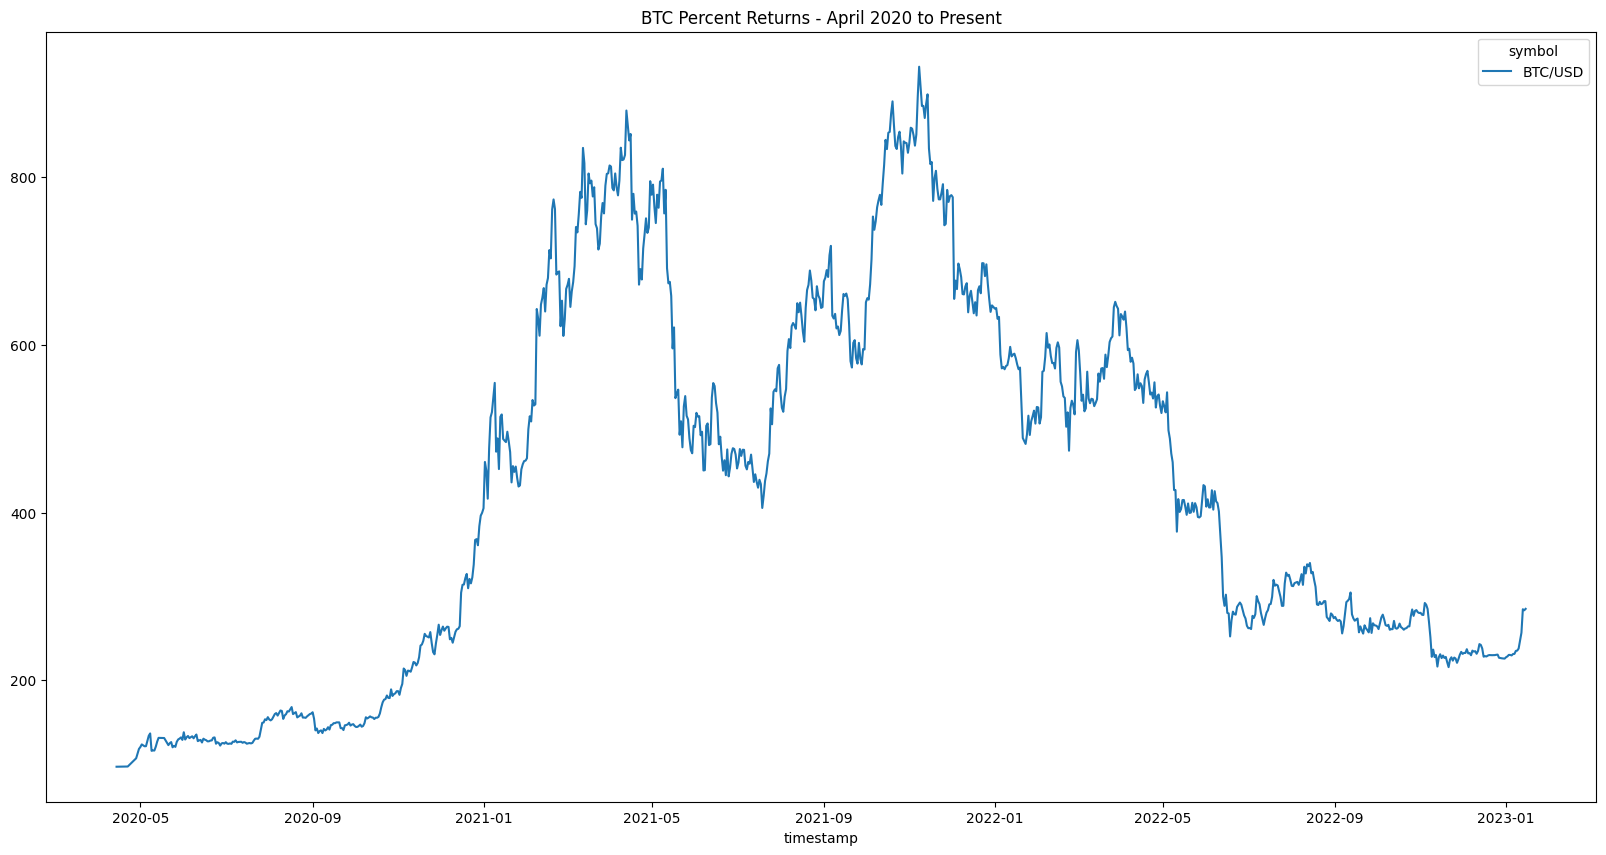

In [60]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(20,10), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

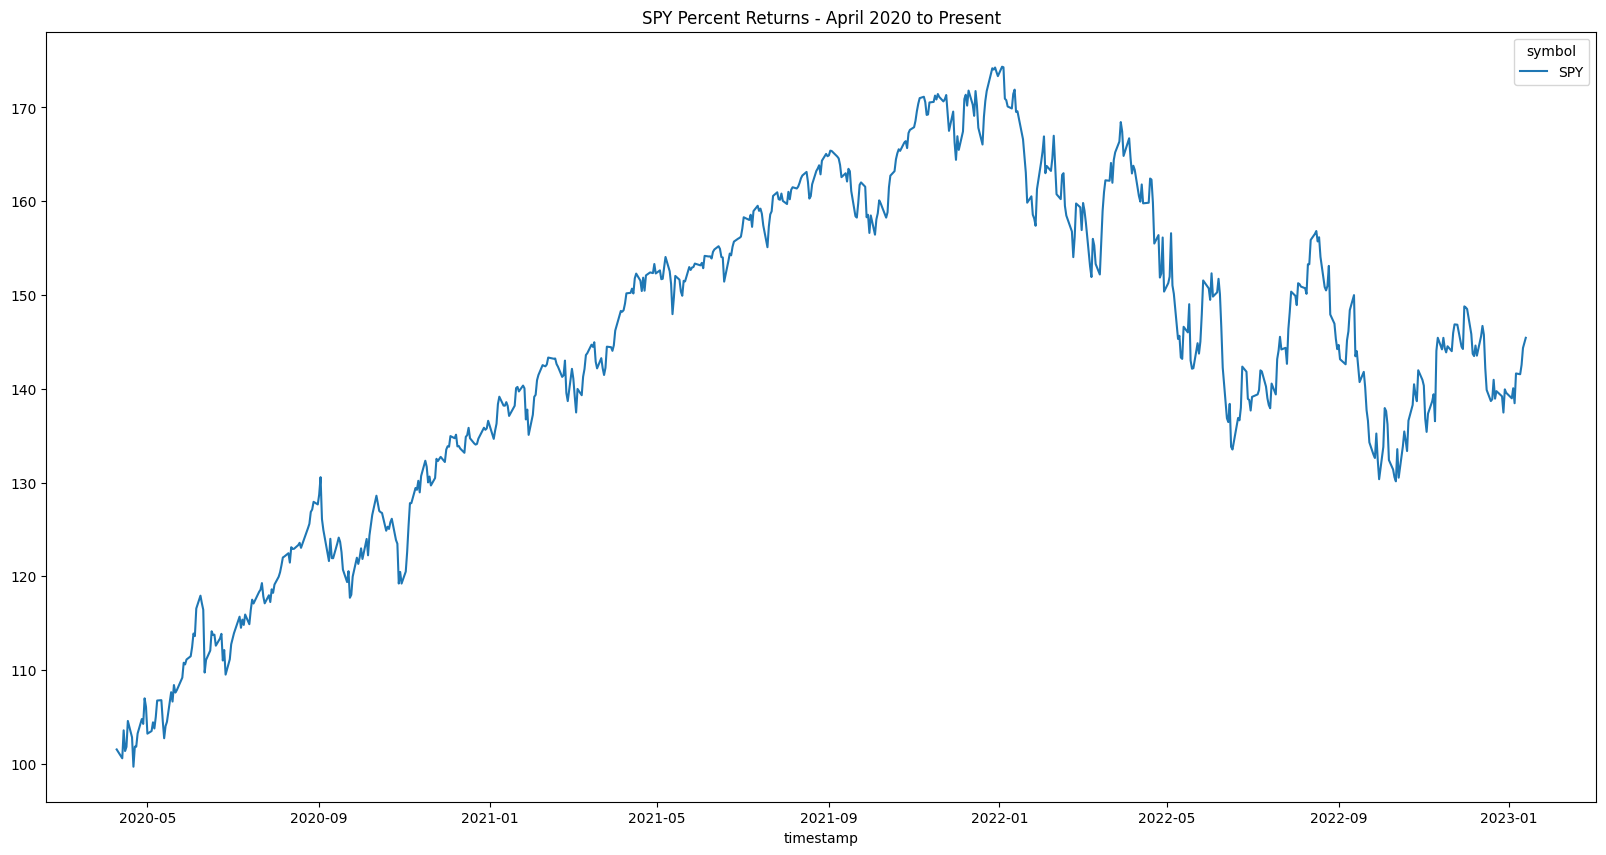

In [61]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(20,10), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

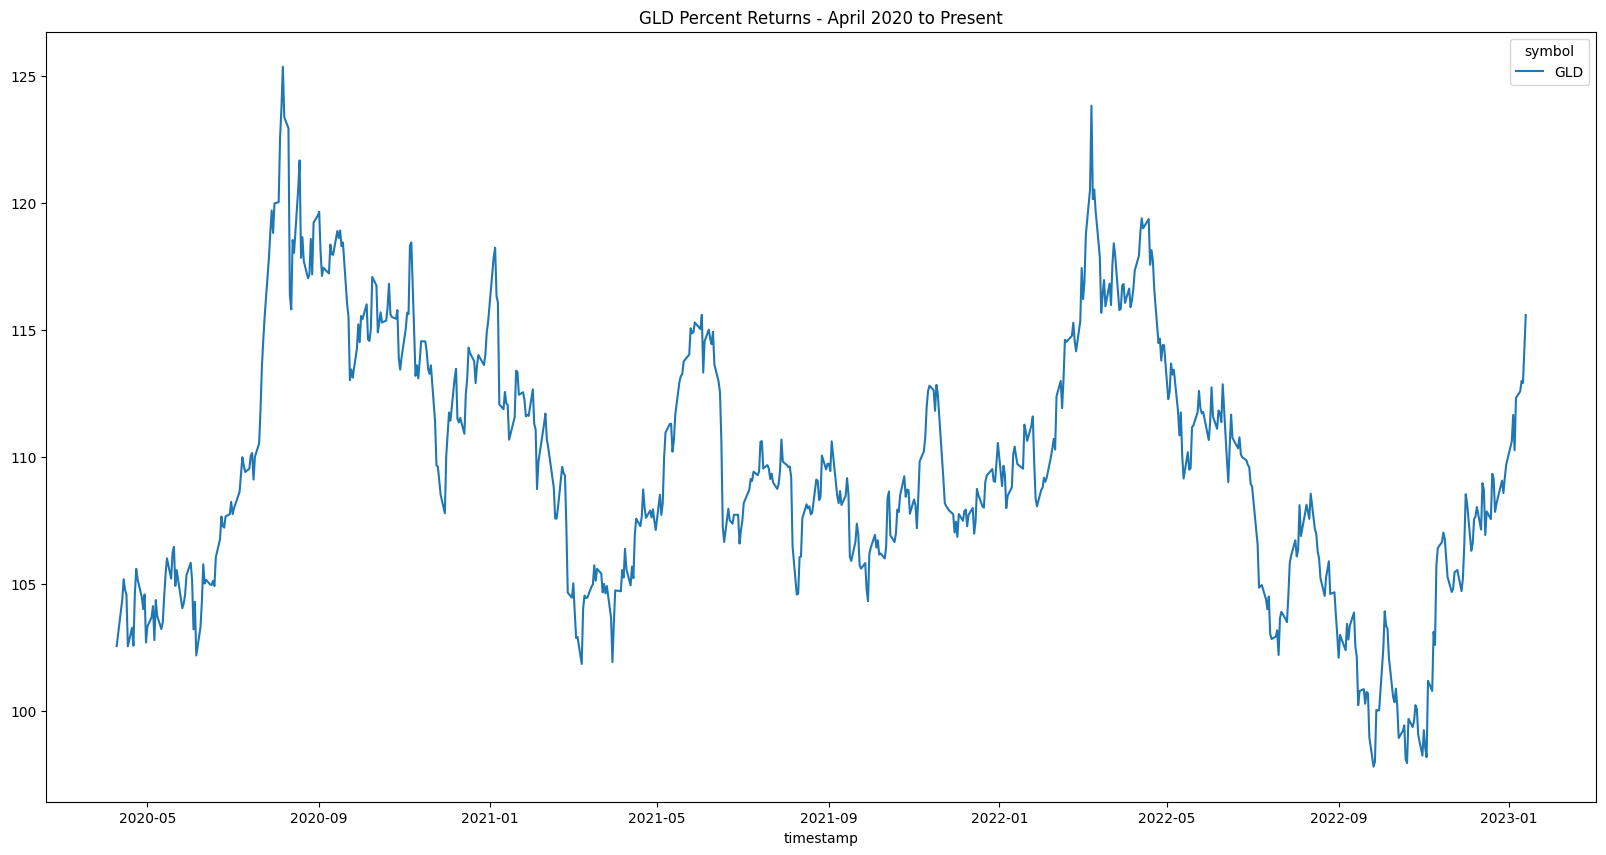

In [62]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(20,10), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

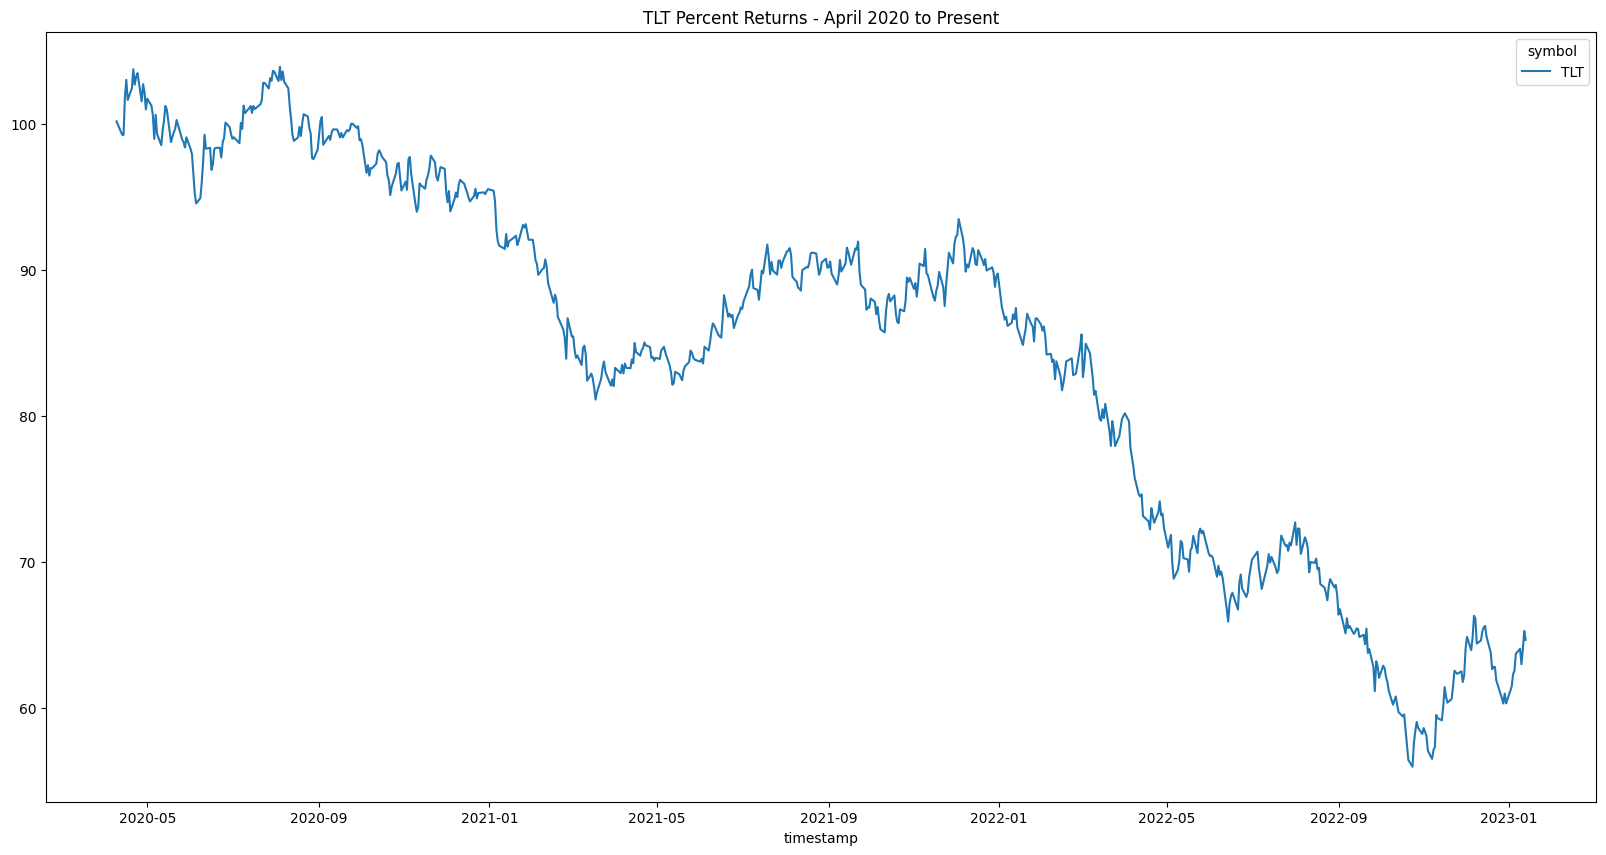

In [63]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(20,10), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

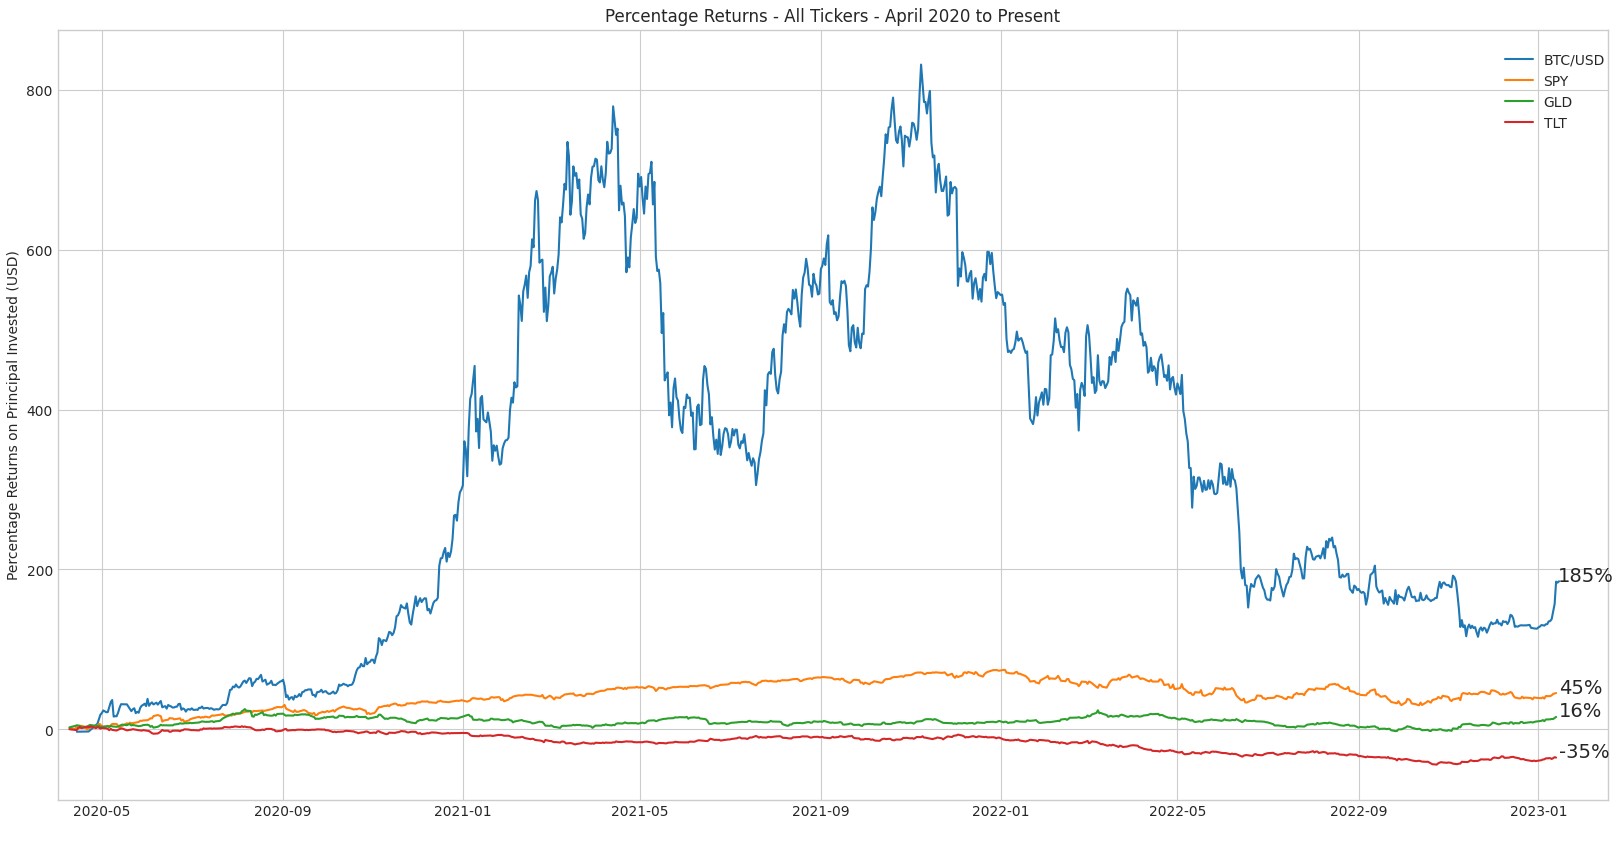

In [67]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(20,10), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text('2023-1-15', TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text('2023-1-15', GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text('2023-1-15', SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text('2023-1-14', BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', '2023-02-17')
    plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [68]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       983 non-null    object 
 1   timestamp    983 non-null    object 
 2   open         983 non-null    float64
 3   high         983 non-null    float64
 4   low          983 non-null    float64
 5   close        983 non-null    float64
 6   volume       983 non-null    float64
 7   trade_count  983 non-null    float64
 8   vwap         983 non-null    float64
dtypes: float64(7), object(2)
memory usage: 69.2+ KB


In [76]:
# Shifting timestamp back to datetime to filter on month end dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       983 non-null    object        
 1   timestamp    983 non-null    datetime64[ns]
 2   open         983 non-null    float64       
 3   high         983 non-null    float64       
 4   low          983 non-null    float64       
 5   close        983 non-null    float64       
 6   volume       983 non-null    float64       
 7   trade_count  983 non-null    float64       
 8   vwap         983 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 69.2+ KB


In [78]:
# Filtering for month end dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_end] 
btc_monthly

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
4,BTC/USD,2020-04-30,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
28,BTC/USD,2020-05-31,9458.00,9458.00,9438.50,9438.50,0.045900,2.0,9445.084967
58,BTC/USD,2020-06-30,9136.00,9186.00,9072.00,9110.50,2.893800,56.0,9149.372572
89,BTC/USD,2020-07-31,11125.00,11420.00,11125.00,11420.00,0.803300,4.0,11343.416532
115,BTC/USD,2020-08-31,11740.50,11749.50,11727.00,11732.50,2.009200,9.0,11736.142768
145,BTC/USD,2020-09-30,10740.00,10858.50,10676.00,10810.00,4.187300,32.0,10801.080493
176,BTC/USD,2020-10-31,13654.50,14055.50,13623.50,13684.00,16.386400,55.0,13741.190670
206,BTC/USD,2020-11-30,18518.00,20088.00,18399.00,19479.50,28.766800,271.0,19334.969743
237,BTC/USD,2020-12-31,29022.50,29528.00,28075.50,29240.50,67.276100,877.0,28913.072805
268,BTC/USD,2021-01-31,33710.00,34181.00,32187.00,33779.00,974.508700,1761.0,32611.185938


In [79]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset

,timestamp,close
4,2020-04-30,8653.00
28,2020-05-31,9438.50
58,2020-06-30,9110.50
89,2020-07-31,11420.00
115,2020-08-31,11732.50
145,2020-09-30,10810.00
176,2020-10-31,13684.00
206,2020-11-30,19479.50
237,2020-12-31,29240.50
268,2021-01-31,33779.00


In [80]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset

,timestamp,close
0,2020-04-30,8653.00
1,2020-05-31,9438.50
2,2020-06-30,9110.50
3,2020-07-31,11420.00
4,2020-08-31,11732.50
5,2020-09-30,10810.00
6,2020-10-31,13684.00
7,2020-11-30,19479.50
8,2020-12-31,29240.50
9,2021-01-31,33779.00


In [81]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index

,close
timestamp,
2020-04-30,8653.00
2020-05-31,9438.50
2020-06-30,9110.50
2020-07-31,11420.00
2020-08-31,11732.50
2020-09-30,10810.00
2020-10-31,13684.00
2020-11-30,19479.50
2020-12-31,29240.50


In [82]:
# Calculating month over month pct change
# pct change requires index to be of form datetime
btc_chg = btc_index.pct_change()
btc_chg

,close
timestamp,
2020-04-30,NaN
2020-05-31,0.090778
2020-06-30,-0.034751
2020-07-31,0.253499
2020-08-31,0.027364
2020-09-30,-0.078628
2020-10-31,0.265865
2020-11-30,0.423524
2020-12-31,0.501091


In [84]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2020-04-30 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   32 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [86]:
# Resetting index to change date back to string to prep for plotting
btc_chg_reset = btc_chg.reset_index()
btc_chg_reset

,timestamp,close
0,2020-04-30,NaN
1,2020-05-31,0.090778
2,2020-06-30,-0.034751
3,2020-07-31,0.253499
4,2020-08-31,0.027364
5,2020-09-30,-0.078628
6,2020-10-31,0.265865
7,2020-11-30,0.423524
8,2020-12-31,0.501091
9,2021-01-31,0.155213


In [88]:
# Converting timestamp back to string so that datetime format doesn't appear in plot tick labels
btc_chg_reset['timestamp'] = btc_chg_reset['timestamp'].dt.date
btc_chg_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  33 non-null     object 
 1   close      32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [90]:
# Setting timestamp back to index for plotting
btc_set_index = btc_chg_reset.set_index('timestamp')
btc_set_index

,close
timestamp,
2020-04-30,NaN
2020-05-31,0.090778
2020-06-30,-0.034751
2020-07-31,0.253499
2020-08-31,0.027364
2020-09-30,-0.078628
2020-10-31,0.265865
2020-11-30,0.423524
2020-12-31,0.501091


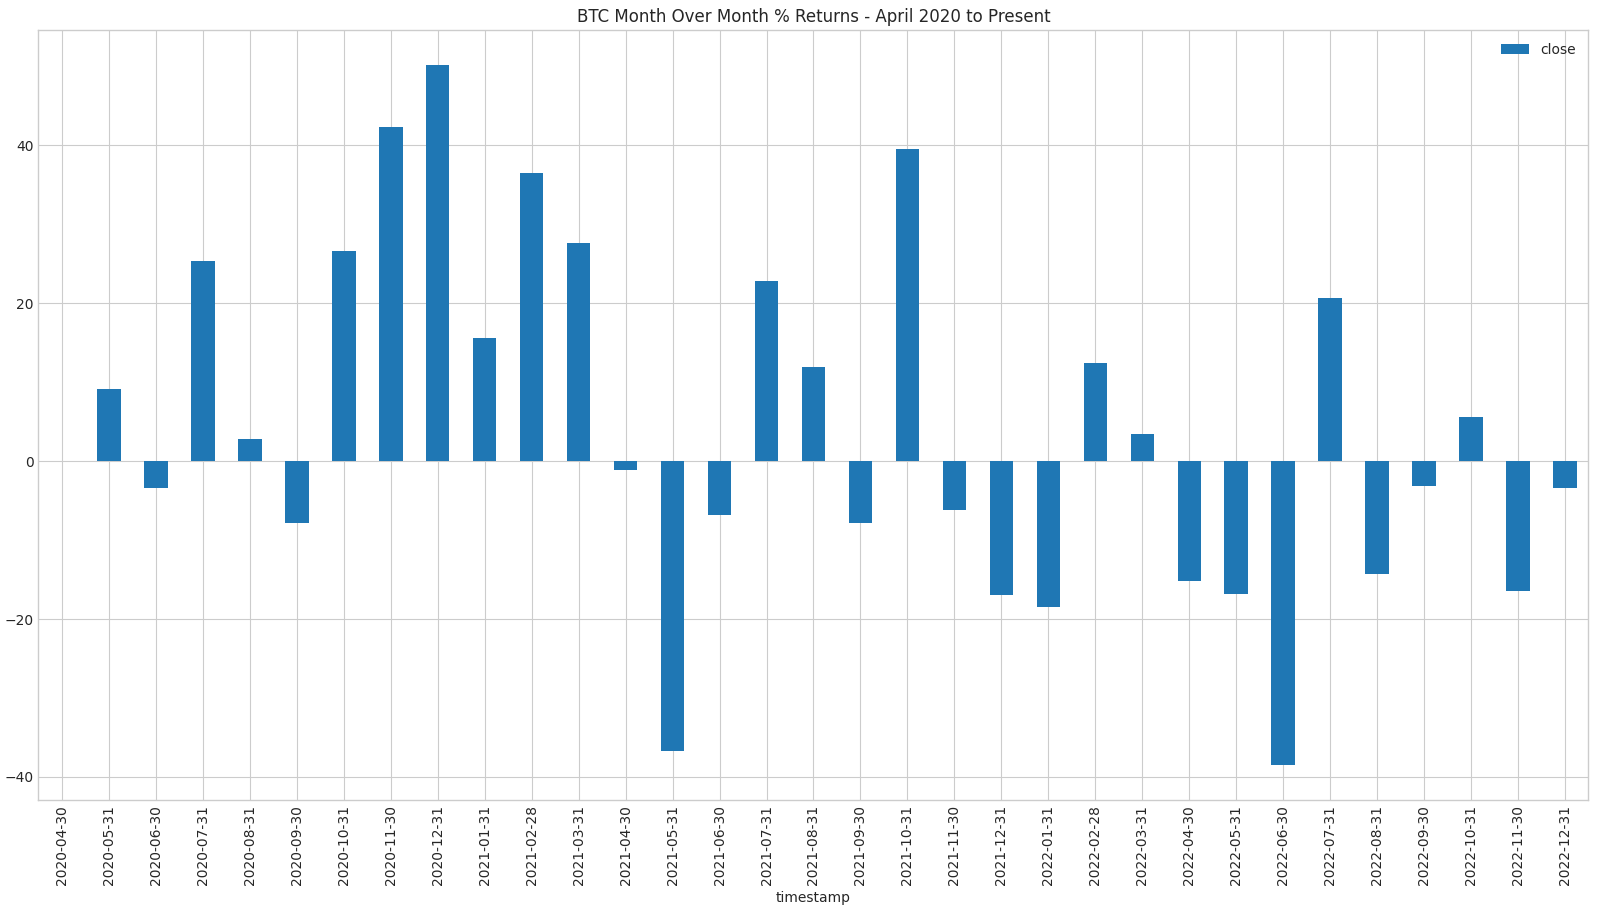

In [92]:
# Plot performance in percentage terms and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_set_index*100).plot(kind='bar', figsize=(20,10), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")